In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
import citipy
from citipy import citipy
from datetime import datetime



In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))
lat_lngs

[(-53.76371476421361, -88.23539703290633),
 (-72.02778006534277, -152.46586411759918),
 (-50.95038444344675, -121.65209632955026),
 (-19.76960535518384, -50.270252364680374),
 (36.90817559808056, -42.134189902111615),
 (-88.58318002613201, -55.20969529699087),
 (-5.659959701633284, -25.49199855525194),
 (39.031690491573045, -147.71925678122068),
 (66.79977169738856, 28.49384982074079),
 (-80.5895519938683, -50.8776980604315),
 (18.050446126541388, 117.43449379910447),
 (74.98063961206233, 14.734141009567594),
 (-22.500622523759702, -88.9022895723748),
 (-83.069186607021, -94.74128935364676),
 (-62.07970899818048, -144.41661107478404),
 (-19.52162855828, -23.416630615181475),
 (-76.59690727539495, 100.77564216828625),
 (70.96531977942527, -106.2351780742998),
 (-10.514536098833545, -108.1420427646735),
 (88.55479774705697, 26.26011413198009),
 (-65.7058791847827, -51.216732907240214),
 (-52.43183564149848, 38.82078232094406),
 (3.3940896100171187, 59.44550146852106),
 (-46.9598579241231

In [3]:
lat_lngs[0][1]

-88.23539703290633

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [5]:
# Starting URL for Weather Map API Call.

url = f"https://api.openweathermap.org/data/2.5/weather?q={cities[0]}&appid={weather_api_key}&units=imperial"

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | iturama
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | cabedelo
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | kuusamo
Processing Record 10 of Set 1 | puro
Processing Record 11 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | norman wells
Processing Record 22 of Set 1 | shetpe
Proces

Processing Record 39 of Set 4 | whitehorse
Processing Record 40 of Set 4 | khatanga
Processing Record 41 of Set 4 | saint anthony
Processing Record 42 of Set 4 | goderich
Processing Record 43 of Set 4 | vathi
Processing Record 44 of Set 4 | kontagora
Processing Record 45 of Set 4 | saint-ambroise
Processing Record 46 of Set 4 | inuvik
Processing Record 47 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 4 | goure
Processing Record 49 of Set 4 | makakilo city
Processing Record 50 of Set 4 | cap malheureux
Processing Record 1 of Set 5 | encruzilhada
Processing Record 2 of Set 5 | dinan
Processing Record 3 of Set 5 | bhimavaram
Processing Record 4 of Set 5 | pacifica
Processing Record 5 of Set 5 | tromso
Processing Record 6 of Set 5 | bima
Processing Record 7 of Set 5 | sinnamary
Processing Record 8 of Set 5 | hereford
Processing Record 9 of Set 5 | san cristobal
Processing Record 10 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 11 o

Processing Record 35 of Set 8 | doha
Processing Record 36 of Set 8 | tual
Processing Record 37 of Set 8 | mahebourg
Processing Record 38 of Set 8 | nanortalik
Processing Record 39 of Set 8 | souillac
Processing Record 40 of Set 8 | kavaratti
Processing Record 41 of Set 8 | narsaq
Processing Record 42 of Set 8 | ilave
Processing Record 43 of Set 8 | bandarbeyla
Processing Record 44 of Set 8 | udachnyy
Processing Record 45 of Set 8 | herat
Processing Record 46 of Set 8 | la tuque
Processing Record 47 of Set 8 | koryazhma
Processing Record 48 of Set 8 | port lincoln
Processing Record 49 of Set 8 | olafsvik
Processing Record 50 of Set 8 | jhelum
Processing Record 1 of Set 9 | bastia
Processing Record 2 of Set 9 | kudahuvadhoo
Processing Record 3 of Set 9 | ballina
Processing Record 4 of Set 9 | chernogorsk
Processing Record 5 of Set 9 | kachiry
Processing Record 6 of Set 9 | pashiya
Processing Record 7 of Set 9 | kavos
Processing Record 8 of Set 9 | bullhead city
Processing Record 9 of Set

Processing Record 26 of Set 12 | abu kamal
Processing Record 27 of Set 12 | twentynine palms
Processing Record 28 of Set 12 | tazmalt
Processing Record 29 of Set 12 | himare
Processing Record 30 of Set 12 | ucluelet
Processing Record 31 of Set 12 | kushnarenkovo
Processing Record 32 of Set 12 | zhigansk
Processing Record 33 of Set 12 | gorontalo
Processing Record 34 of Set 12 | newton aycliffe
Processing Record 35 of Set 12 | zeya
Processing Record 36 of Set 12 | la asuncion
Processing Record 37 of Set 12 | pitimbu
Processing Record 38 of Set 12 | compostela
Processing Record 39 of Set 12 | msanga
Processing Record 40 of Set 12 | pilao arcado
City not found. Skipping...
Processing Record 41 of Set 12 | chagda
City not found. Skipping...
Processing Record 42 of Set 12 | halifax
Processing Record 43 of Set 12 | baffa
Processing Record 44 of Set 12 | jibuti
Processing Record 45 of Set 12 | muros
Processing Record 46 of Set 12 | yomitan
City not found. Skipping...
Processing Record 47 of S

In [7]:
len(city_data)

578

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,46.51,81,75,4.61,CL,2021-08-12 05:52:32
1,Mataura,-46.1927,168.8643,47.48,73,96,8.99,NZ,2021-08-12 05:54:11
2,Rikitea,-23.1203,-134.9692,73.00,69,1,6.17,PF,2021-08-12 05:54:12
3,Iturama,-19.7281,-50.1956,67.30,49,19,4.79,BR,2021-08-12 05:54:12
4,Ribeira Grande,38.5167,-28.7000,72.36,86,32,18.70,PT,2021-08-12 05:54:13
5,Ushuaia,-54.8000,-68.3000,46.06,53,40,20.71,AR,2021-08-12 05:54:13
6,Cabedelo,-6.9811,-34.8339,74.07,89,59,10.16,BR,2021-08-12 05:54:14
7,Kodiak,57.7900,-152.4072,54.91,88,75,8.05,US,2021-08-12 05:54:14
8,Kuusamo,65.9667,29.1833,60.84,77,0,3.44,FI,2021-08-12 05:54:15
9,Puro,12.4841,123.3827,86.49,65,100,2.91,PH,2021-08-12 05:54:15


In [9]:
# Reorder the columns.

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-08-12 05:52:32,-53.1500,-70.9167,46.51,81,75,4.61
1,Mataura,NZ,2021-08-12 05:54:11,-46.1927,168.8643,47.48,73,96,8.99
2,Rikitea,PF,2021-08-12 05:54:12,-23.1203,-134.9692,73.00,69,1,6.17
3,Iturama,BR,2021-08-12 05:54:12,-19.7281,-50.1956,67.30,49,19,4.79
4,Ribeira Grande,PT,2021-08-12 05:54:13,38.5167,-28.7000,72.36,86,32,18.70


In [10]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

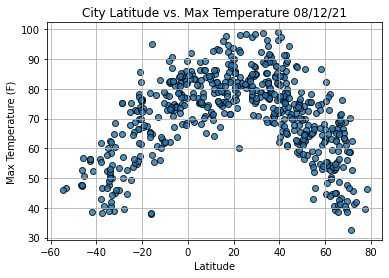

In [12]:
# Import time module.

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           max_temps,
           edgecolor = "black",
           linewidths = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

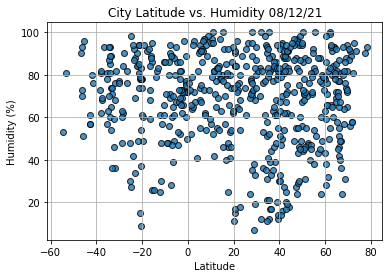

In [13]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

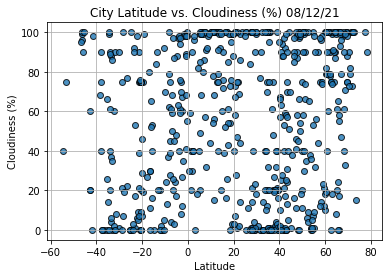

In [14]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

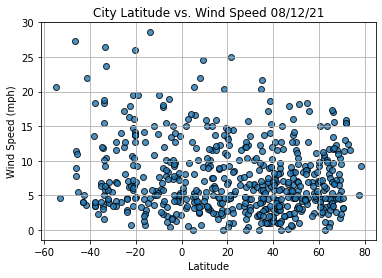

In [15]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [16]:
# Import linregress

from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

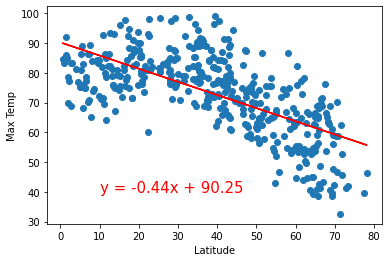

In [18]:
# Linear regression on the Northern Hemisphere.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature", "Max Temp", (10,40))



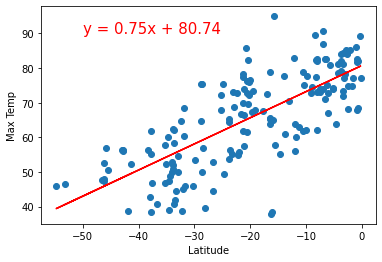

In [19]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


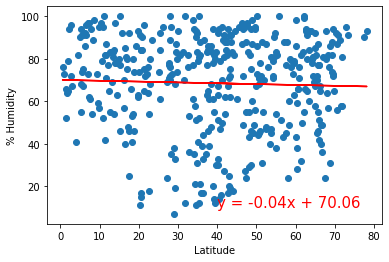

In [20]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

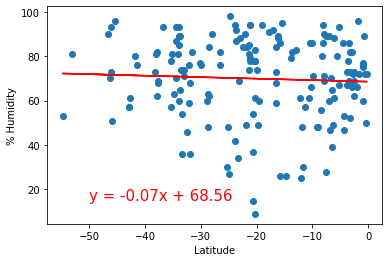

In [21]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

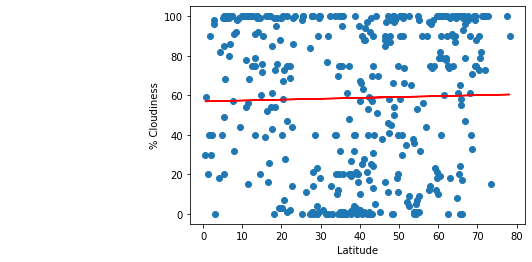

In [22]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

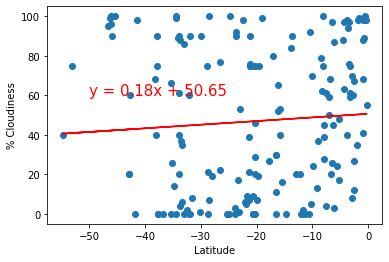

In [23]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

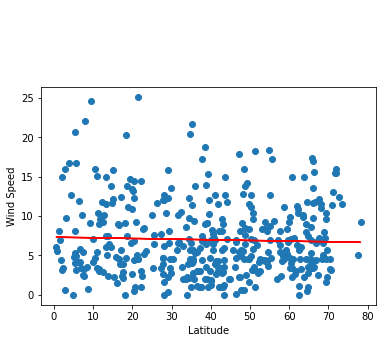

In [24]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,35))

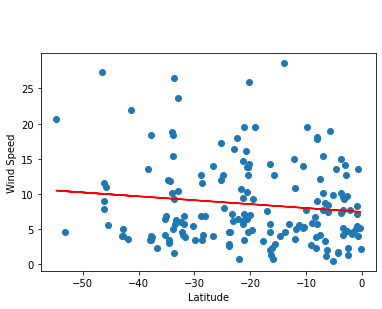

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))